In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [7]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

clf_rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf_rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params)
best_clf_rf.fit(X_train, y_train)

y_pred_rf = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Best Parameters:", best_params)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 0.7960526315789473
Random Forest Classification Report:
               precision    recall  f1-score   support

           C       0.87      0.98      0.92        82
           K       0.63      0.48      0.55        25
           N       0.96      0.88      0.92        25
           P       0.00      0.00      0.00         4
           R       0.41      0.44      0.42        16

    accuracy                           0.80       152
   macro avg       0.57      0.55      0.56       152
weighted avg       0.77      0.80      0.78       152



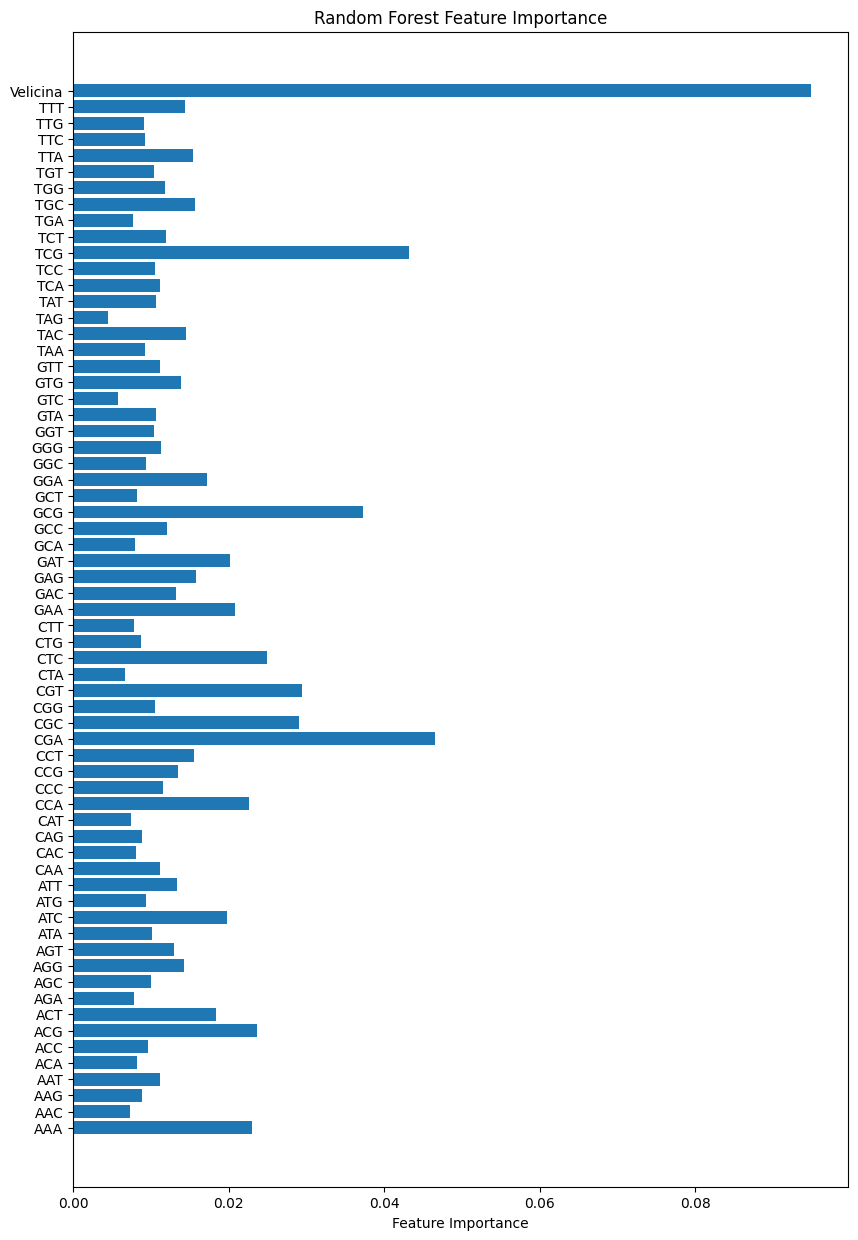

In [8]:
feature_names = X_test.columns

plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.show()